In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Wine.csv')
dataset = data
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
x = dataset.iloc[:,:13].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y = dataset.iloc[:,13].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.37281068, 0.18739996])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [ ]:
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.show()
cm

array([[16,  0,  0],
       [ 1, 20,  0],
       [ 0,  0,  8]])

<function matplotlib.pyplot.show(close=None, block=None)>

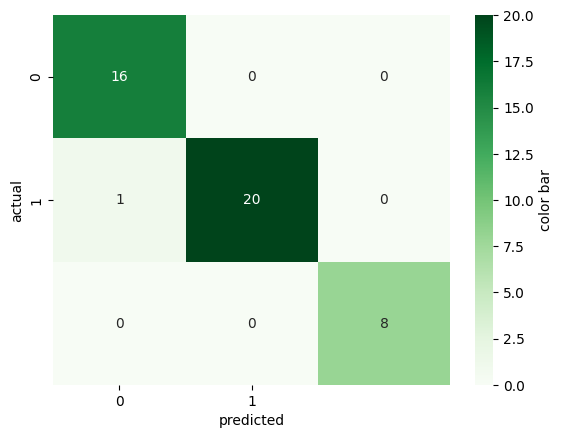

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap ='Greens', annot = True, cbar_kws = {"orientation":"vertical","label":"color bar"}, xticklabels = [0,1], yticklabels = [0,1])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show

In [ ]:
from sklearn import metrics
prediction = metrics.accuracy_score(y_test, y_pred)
print('accuracy:',prediction*100,'%')

accuracy: 97.77777777777777 %


<ipython-input-26-27c0ea022552>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


<function matplotlib.pyplot.show(close=None, block=None)>

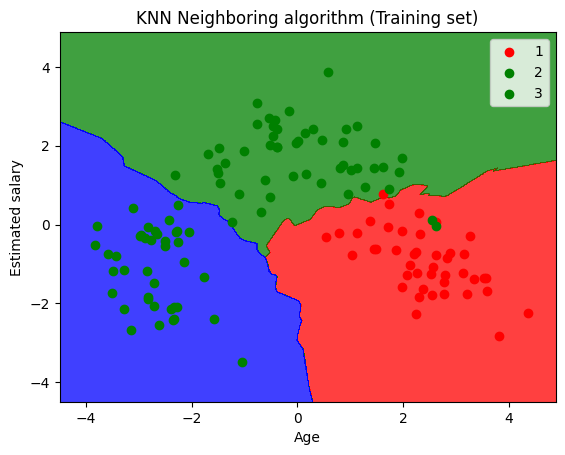

In [ ]:
from matplotlib.colors import ListedColormap
X_set , Y_set = x_train ,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('red','green'))(i),label =j)
plt.title('KNN Neighboring algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show